# 📊 Sentiment Analysis Final Project

---

## 🎯 Project Overview

Welcome to your Sentiment Analysis final project! In this project, you will:

- 🔍 **Analyze** customer reviews or social media text data
- 🧹 **Preprocess** text data using NLP techniques
- 🤖 **Build** and compare multiple classification models
- 📈 **Evaluate** model performance using appropriate metrics
- 💼 **Communicate** findings in a business context

---

## 📋 Project Requirements

- **Dataset**: Use a public sentiment dataset (e.g., IMDb reviews, Amazon reviews, airline tweets)
- **Models**: Train at least **2 different classification models**
- **Evaluation**: Use multiple metrics (accuracy, precision, recall, confusion matrix)
- **Documentation**: Use markdown cells to explain your approach, findings, and insights

---

## 💡 Important Tips for Success

### Working with Limited Resources
- ⚡ **Start small**: Use `df.sample(n=1000)` or `df.head(5000)` to work with a subset
- 🎯 **Limit vocabulary**: Use `max_features=5000` in TfidfVectorizer
- 🚀 **Choose efficient models**: LogisticRegression and MultinomialNB are fast and effective
- 💾 **Save your work frequently**: Use Ctrl+S or Cmd+S often

### Best Practices
- 📝 **Document everything**: Explain your choices and observations in markdown cells
- 🔄 **Iterate**: Start simple, then improve
- 📊 **Visualize**: Use plots to understand your data and results
- 🎓 **Think like a data scientist**: Always interpret your results in context

---

Let's get started! 🚀

---

# Part 1: Project Definition 🎯

## Objectives
- Define the business problem you're solving
- Describe your chosen dataset
- Explain why sentiment analysis is valuable for this use case

## Instructions

In the markdown cell below, answer these questions:

1. **What is the business problem?**
   - What decision or insight will this sentiment analysis support?
   - Who would use these results?

2. **What dataset are you using?**
   - Name and source of the dataset
   - Number of samples
   - What the text represents (reviews, tweets, comments, etc.)
   - What are the sentiment labels (positive/negative, star ratings, etc.)?

3. **Why is this problem important?**
   - How could the results be used in real-world scenarios?

---

## 📝 Your Project Definition

**Business Problem:**

*[This would result in finding the positives and negative reviews helping find a solution to make a better movie. Mainly movie industries would consider these options.]*

---

**Dataset Description:**


- **Dataset name**: IMDB Dataset(csv file in second coding block)
- **Source**: Kaggle
- **Number of samples**: 50K samples
- **Text type**: comments
- **Sentiment labels**: Positives/Negatives

---

**Importance and Real-World Applications:**

*[This would help in a real world scenerio as it would consider options for producers to discuss as the best course of action to obtain the best results of positive reviews.]*

---

# Part 2: Exploratory Data Analysis (EDA) 🔍

## Objectives
- Load and examine your dataset
- Understand the distribution of sentiments
- Analyze text characteristics (length, common words, etc.)
- Identify any data quality issues

## What to Explore

✅ **Dataset structure**: Shape, columns, data types

✅ **Missing values**: Check for and handle missing data

✅ **Class distribution**: Are sentiments balanced?

✅ **Text length**: Average, min, max review lengths

✅ **Common words**: Most frequent words per sentiment

✅ **Sample reviews**: Display examples from each class

---

## 💡 Tips
- Use `.info()`, `.describe()`, and `.value_counts()` for quick insights
- Visualize distributions with bar plots and histograms
- Look for imbalanced classes that might affect model performance
- Create a word cloud to visualize common terms (optional but impressive!)

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [3]:
# Load your dataset
df = pd.read_csv('/content/IMDB Dataset.csv')
# For large datasets, consider using nrows parameter: pd.read_csv('file.csv', nrows=10000)

# YOUR CODE HERE
  # Replace with your data loading code

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names: {df.columns.tolist()}")
df.head()

Dataset shape: (50000, 2)

Column names: ['review', 'sentiment']


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
# Check for missing values
# YOUR CODE HERE
print("Missing values per column:")
display(df.isnull().sum())

print("\nDataFrame Info:")
df.info()

# Hint: Use df.isnull().sum() or df.info()

Missing values per column:


,0
review,0
sentiment,0



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
# 🎯 IMPORTANT: If working with limited resources, sample your data here
# Uncomment and modify as needed:

df_sample = df.sample(n=5000, random_state=42)
print(f"Working with {len(df_sample)} samples")
df = df_sample  # Use the sample for the rest of the project

Working with 5000 samples


Sentiment Distribution:


,count
sentiment,
positive,2519
negative,2481


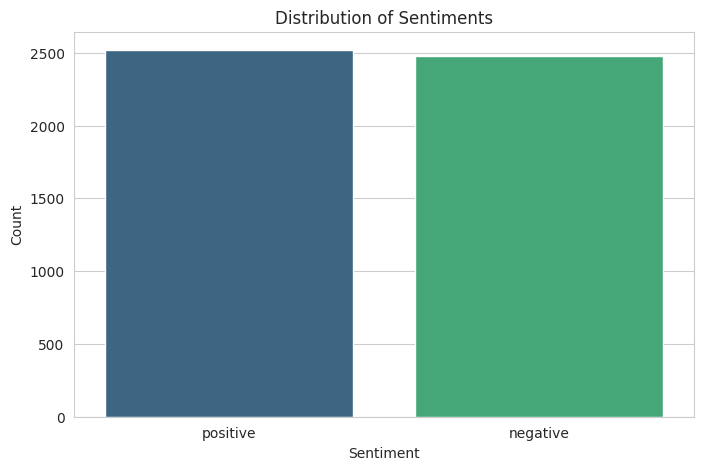

In [9]:
# Analyze sentiment distribution
# YOUR CODE HERE

# df['sentiment_column'].value_counts()
# Create a bar plot to visualize the distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
print("Sentiment Distribution:")
display(sentiment_counts)

# Create a bar plot to visualize the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### 📊 Interpretation: Class Balance

*Write your observations here:*
- Are the classes balanced or imbalanced?

 No
- If imbalanced, how might this affect your model?

It could give a false reading of what are important towards the goal.
- What could you do to address imbalance?

If there was i could find values to balance or take away.


Descriptive statistics for text length:


,text_length
count,5000.000000
mean,1321.292800
std,986.964369
min,106.000000
25%,699.750000
50%,976.500000
75%,1613.250000
max,6230.000000


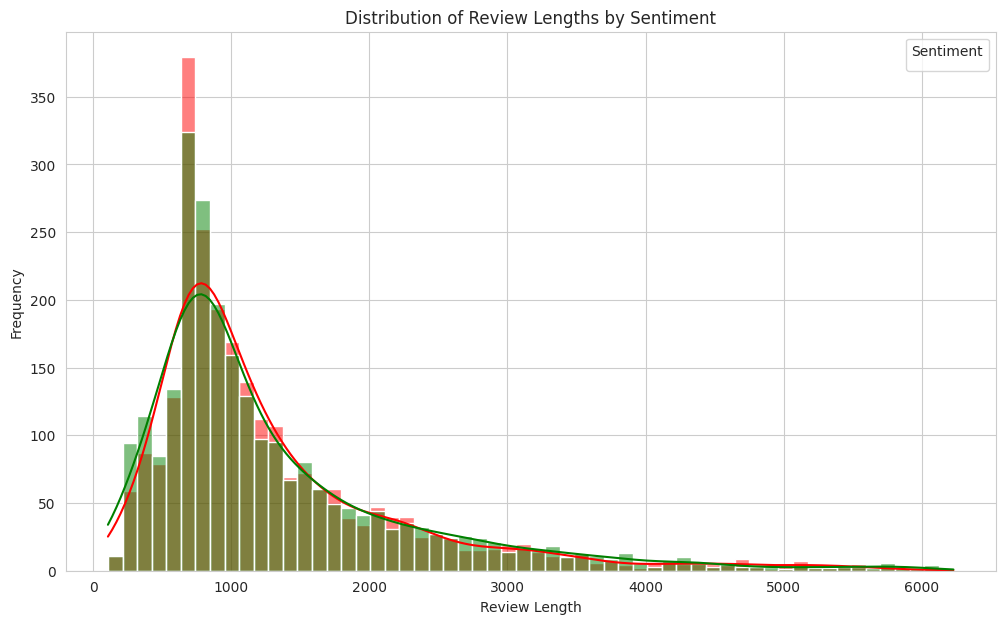

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze text length distribution
# YOUR CODE HERE

# Hint: Create a new column for text length
df['text_length'] = df['review'].str.len()

# Display descriptive statistics for text length
print("\nDescriptive statistics for text length:")
display(df['text_length'].describe())

# Plot histogram of text lengths, comparing lengths across different sentiments
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='text_length', hue='sentiment', kde=True, palette={'positive': 'green', 'negative': 'red'})
plt.title('Distribution of Review Lengths by Sentiment')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.legend(title='Sentiment')
plt.show()

### 📊 Interpretation: Text Length

*Write your observations here:*
- What's the average text length?

The mean was 1321 in text length.
- Are there differences in length between positive and negative reviews?

There really isnt a huge difference, we can tell from the vomit green color where positive(green) and negatives(red) meet in this graph.

- Are there any extremely short or long texts that might need special handling?

There are a few but doesn't look like it needs much handling at this point. We can adjust it in the later section once we have more visual representations.

In [15]:
# Display sample reviews from each sentiment class
# YOUR CODE HERE

# Hint: Use df[df['sentiment'] == 'positive'].sample(3)
# Display examples from each class to get a feel for the data

print("\n--- Sample Positive Reviews ---")
for i, review in enumerate(df[df['sentiment'] == 'positive']['review'].sample(3, random_state=42)): # Added random_state for reproducibility
    print(f"Review {i+1}:\n{review[:300]}...\n") # Display first 300 chars

print("\n--- Sample Negative Reviews ---")
for i, review in enumerate(df[df['sentiment'] == 'negative']['review'].sample(3, random_state=42)): # Added random_state for reproducibility
    print(f"Review {i+1}:\n{review[:300]}...\n") # Display first 300 chars


--- Sample Positive Reviews ---
Review 1:
In my opinion, this is one of the greatest movies ever made in America and it deserved every single award it won and it's place on the AFI Top 100 list (though it's shamefully too low on the IMDB Top 250 list, at only #183 as of this writing). If you enjoy acting of the highest calibre (Voight and H...

Review 2:
A Give this Movie a 10/10 because it deserves a 10/10. Two of the best actors of their time-Walter Matthau & George Burns collaborate with Neil Simon and all of the other actors that are in this film + director Herbert Ross, and all of that makes this stage adaption come true. The Sunshine Boys is o...

Review 3:
A terrorist attempts to steal a top secret biological weapon, and in the process of trying to escape, he is infected when the case containing the deadly agent is compromised. Soldiers are able to retrieve the case, but the terrorist makes his way to a hotel where he attempts to hide out. They eventu...


--- Sample Negative R

Top 20 Most Common Words:


,word,count
0,the,64405
1,a,32003
2,and,31435
3,of,28987
4,to,26556
5,is,20704
6,in,18222
7,this,14126
8,i,13874
9,it,13061


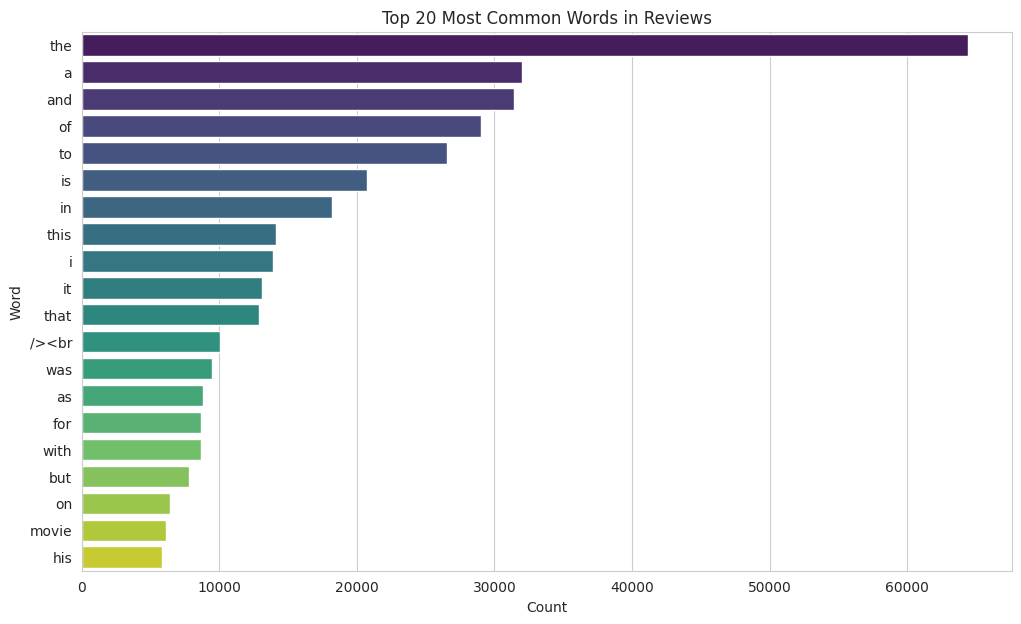

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Analyze common words
# YOUR CODE HERE

# Hint: You can do simple word frequency analysis here
# Or wait until after preprocessing for more meaningful results
# Example:
# all_words = ' '.join(df['text_column']).lower().split()
# common_words = Counter(all_words).most_common(20)
# Plot a bar chart of most common words

# Concatenate all reviews into a single string, convert to lowercase, and split into words
all_reviews_text = ' '.join(df['review']).lower()
words = all_reviews_text.split()

# Count word frequencies
most_common_words = Counter(words).most_common(20)

# Create a DataFrame for easier plotting
common_words_df = pd.DataFrame(most_common_words, columns=['word', 'count'])

print("Top 20 Most Common Words:")
display(common_words_df)

# Plot a bar chart of most common words
plt.figure(figsize=(12, 7))
sns.barplot(x='count', y='word', data=common_words_df, palette='viridis')
plt.title('Top 20 Most Common Words in Reviews')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()


### 📝 EDA Summary

*Summarize your key findings from the EDA:*

1. **Dataset characteristics**:
2. **Data quality issues**:
3. **Key patterns observed**:
4. **Potential challenges**:

This EDA shows the varous words repeated that could be used in consideration when looking over reviews to adjust movie features. We can see what words we would focus on, the only quality is it showing not directly what comment these are coming from. Based off of the patterns we can see that any word with a vowel had a consideration priority in the chart. The only challenge would be to find other words that dont seem to be as neccessary which we can encode into later but that would be time consuming depending on what reviews if positive or negative. The best way to use this would to find key words and use the ctrl+f method to help dumb down these options from the sites.

---

# Part 3: Data Preprocessing & Feature Extraction 🧹

## Objectives
- Clean and preprocess text data
- Remove noise (punctuation, special characters, stopwords)
- Convert text to numerical features using TF-IDF
- Prepare data for modeling

## Preprocessing Steps to Consider

✅ **Lowercase conversion**: Standardize text

✅ **Remove punctuation**: Clean special characters

✅ **Remove stopwords**: Filter out common words ("the", "is", "and", etc.)

✅ **Remove numbers**: Unless relevant to sentiment

✅ **Handle negations**: Be careful! "not good" vs "good" (advanced, optional)

---

## 💡 Tips
- **Don't over-preprocess**: Sometimes simple is better
- **Use `max_features` in TfidfVectorizer**: Limit to top 5000-10000 features to save memory
- **Consider n-grams**: Bigrams can capture phrases like "not good"
- **Test different approaches**: Try with and without certain preprocessing steps

In [18]:
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# For stopwords
# Option 1: Use sklearn's built-in stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Option 2: Use NLTK (uncomment if you prefer)
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# stop_words = set(stopwords.words('english'))

print("✅ Preprocessing libraries imported!")

# Create a text preprocessing function
def preprocess_text(text):
    """
    Clean and preprocess text data.

    Args:
        text (str): Raw text string

    Returns:
        str: Cleaned text string
    """
    # YOUR CODE HERE

    # Hint: Steps to implement:
    # 1. Convert to lowercase: text = text.lower()
    # 2. Remove URLs: text = re.sub(r'http\S+|www\S+', '', text)
    # 3. Remove mentions and hashtags: text = re.sub(r'@\w+|#\w+', '', text)
    # 4. Remove punctuation: text = text.translate(str.maketrans('', '', string.punctuation))
    # 5. Remove numbers: text = re.sub(r'\d+', '', text)
    # 6. Remove extra whitespace: text = ' '.join(text.split())

    # 1. Convert to lowercase
    text = text.lower()
    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    # 3. Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # 4. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # 5. Remove numbers
    text = re.sub(r'\d+', '', text)
    # 6. Remove extra whitespace
    text = ' '.join(text.split())

    return text

# Test your function on a sample text
sample_text = "This is a TEST!!! Check out https://example.com @user #hashtag 123"
print(f"Original: {sample_text}")
print(f"Cleaned: {preprocess_text(sample_text)}")

✅ Preprocessing libraries imported!
Original: This is a TEST!!! Check out https://example.com @user #hashtag 123
Cleaned: this is a test check out


In [19]:
df['cleaned_text'] = df['review'].apply(preprocess_text)

print("✅ Text preprocessing complete!")
print("Displaying head of DataFrame with cleaned text:")
display(df[['review', 'cleaned_text']].head())

✅ Text preprocessing complete!
Displaying head of DataFrame with cleaned text:


,review,cleaned_text
33553,I really liked this Summerslam due to the look...,i really liked this summerslam due to the look...
9427,Not many television shows appeal to quite as m...,not many television shows appeal to quite as m...
199,The film quickly gets to a major chase scene w...,the film quickly gets to a major chase scene w...
12447,Jane Austen would definitely approve of this o...,jane austen would definitely approve of this o...
39489,Expectations were somewhat high for me when I ...,expectations were somewhat high for me when i ...


In [20]:
X = df['cleaned_text']
y = df['sentiment']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (5000,)
Target shape: (5000,)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 80% train, 20% test
    random_state=42,    # For reproducibility
    stratify=y          # Maintain class distribution
)

print(f"Training features samples: {len(X_train)}")
print(f"Testing features samples: {len(X_test)}")
print(f"Training target samples: {len(y_train)}")
print(f"Testing target samples: {len(y_test)}")

Training features samples: 4000
Testing features samples: 1000
Training target samples: 4000
Testing target samples: 1000


In [22]:
tfidf = TfidfVectorizer(
    max_features=5000,        # ✅ IMPORTANT: Limit features to save memory!
    min_df=2,                 # Ignore terms that appear in fewer than 2 documents
    max_df=0.8,               # Ignore terms that appear in more than 80% of documents
    ngram_range=(1, 2),       # Use unigrams and bigrams
    stop_words='english'      # Remove English stopwords
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"TF-IDF matrix shape (train): {X_train_tfidf.shape}")
print(f"TF-IDF matrix shape (test): {X_test_tfidf.shape}")
print(f"Number of features: {len(tfidf.get_feature_names_out())}")

TF-IDF matrix shape (train): (4000, 5000)
TF-IDF matrix shape (test): (1000, 5000)
Number of features: 5000


In [23]:
# Explore the TF-IDF features (optional)
# YOUR CODE HERE

# Hint: Look at the most important features
# feature_names = tfidf.get_feature_names_out()
# print("Sample features:", feature_names[:20])
feature_names = tfidf.get_feature_names_out()
print("Sample features:", feature_names[:20])
print(f"Total number of TF-IDF features: {len(feature_names)}")

Sample features: ['abandoned' 'abbott' 'abc' 'ability' 'able' 'absence' 'absolute'
 'absolutely' 'absurd' 'abuse' 'abusive' 'academy' 'academy award'
 'accent' 'accents' 'accept' 'acceptable' 'accepted' 'access' 'accident']
Total number of TF-IDF features: 5000


### 📝 Preprocessing Summary

*Document your preprocessing choices:*

1. **Preprocessing steps applied**: Removing unnecessary characters like urls or socialmedia mentions.
2. **TF-IDF parameters chosen**: Numerical.
3. **Final feature count**: 5000 features
4. **Rationale for choices**: We wanted to focus on logical responces and not really emotional, evaluating what words could deliver that method was challenging.

---

# Part 4: Model Training 🤖

## Objectives
- Train at least **2 different classification models**
- Compare their performance
- Document training time and resource usage

## Recommended Models

### Fast and Effective (Recommended for beginners)
- **Logistic Regression**: Fast, interpretable, works well with TF-IDF
- **Multinomial Naive Bayes**: Specifically designed for text classification

### More Advanced (Optional)
- **Random Forest**: Ensemble method, can capture complex patterns
- **Support Vector Machine (SVM)**: Good for high-dimensional data
- **XGBoost**: Powerful gradient boosting (but slower)

---

## 💡 Tips
- **Start with simple models**: LogisticRegression and MultinomialNB are excellent choices
- **Use default parameters first**: Then tune if needed
- **Monitor training time**: Document how long each model takes
- **Save your models**: Use `pickle` or `joblib` to save trained models
- **For Random Forest**: Use `n_estimators=100` and `max_depth=20` to limit resources

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

import time
from datetime import timedelta

print("✅ Model libraries imported!")

✅ Model libraries imported!


In [25]:
# Train Logistic Regression model
# YOUR CODE HERE

# Hint:
# print("Training Logistic Regression...")
# start_time = time.time()

# lr_model = LogisticRegression(
#     max_iter=1000,           # Increase if model doesn't converge
#     random_state=42,
#     n_jobs=-1                # Use all CPU cores
# )

# lr_model.fit(X_train_tfidf, y_train)

# training_time = time.time() - start_time
# print(f"✅ Training complete in {timedelta(seconds=int(training_time))}")
print("Training Logistic Regression...")
start_time = time.time()

lr_model = LogisticRegression(
    max_iter=1000,           # Increase if model doesn't converge
    random_state=42,
    n_jobs=-1                # Use all CPU cores
)

lr_model.fit(X_train_tfidf, y_train)

training_time = time.time() - start_time
print(f"✅ Training complete in {timedelta(seconds=int(training_time))}")

Training Logistic Regression...
✅ Training complete in 0:00:03


## Model 1: Logistic Regression

In [ ]:
# Make predictions with Logistic Regression
# YOUR CODE HERE

# y_pred_lr = lr_model.predict(X_test_tfidf)
# print(f"Predictions shape: {y_pred_lr.shape}")
y_pred_lr = lr_model.predict(X_test_tfidf)
print(f"Predictions shape: {y_pred_lr.shape}")
print("✅ Predictions with Logistic Regression made!")

Predictions shape: (1000,)
✅ Predictions with Logistic Regression made!


## Model 2: Multinomial Naive Bayes

In [ ]:
# Train Naive Bayes model
# YOUR CODE HERE

# Hint:
# print("Training Multinomial Naive Bayes...")
# start_time = time.time()

# nb_model = MultinomialNB()
# nb_model.fit(X_train_tfidf, y_train)

# training_time = time.time() - start_time
# print(f"✅ Training complete in {timedelta(seconds=int(training_time))}")
print("Training Multinomial Naive Bayes...")
start_time = time.time()

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

training_time = time.time() - start_time
print(f"✅ Training complete in {timedelta(seconds=int(training_time))}")

Training Multinomial Naive Bayes...
✅ Training complete in 0:00:00


In [ ]:
# Make predictions with Naive Bayes
# YOUR CODE HERE

# y_pred_nb = nb_model.predict(X_test_tfidf)
y_pred_nb = nb_model.predict(X_test_tfidf)
print(f"Predictions shape: {y_pred_nb.shape}")
print("✅ Predictions with Naive Bayes made!")

Predictions shape: (1000,)
✅ Predictions with Naive Bayes made!


## Model 3 (Optional): Additional Model

*Train a third model if you'd like to explore further!*

In [ ]:
# Train your third model (optional)
# YOUR CODE HERE

# Example: Random Forest
# print("Training Random Forest...")
# start_time = time.time()

# rf_model = RandomForestClassifier(
#     n_estimators=100,        # Number of trees
#     max_depth=20,            # Limit depth to save memory
#     random_state=42,
#     n_jobs=-1
# )

# rf_model.fit(X_train_tfidf, y_train)

# training_time = time.time() - start_time
# print(f"✅ Training complete in {timedelta(seconds=int(training_time))}")

# y_pred_rf = rf_model.predict(X_test_tfidf)

### 📝 Model Training Summary

*Document your models:*

| Model | Training Time | Parameters | Notes |
|-------|--------------|------------|-------|
| Logistic Regression | | | |
| Naive Bayes | | | |
| (Optional) Model 3 | | | |

---

# Part 5: Model Evaluation 📊

## Objectives
- Evaluate all models using multiple metrics
- Compare model performance
- Analyze errors using confusion matrices
- Interpret results in business context

## Metrics to Calculate

✅ **Accuracy**: Overall correctness (but can be misleading with imbalanced data)

✅ **Precision**: Of all positive predictions, how many were correct?

✅ **Recall**: Of all actual positives, how many did we find?

✅ **F1-Score**: Harmonic mean of precision and recall

✅ **Confusion Matrix**: Visualize true vs predicted labels

✅ **Classification Report**: Detailed metrics per class

---

## 💡 Tips
- **Don't rely on accuracy alone**: Especially with imbalanced data
- **Understand the business context**: Is false positive or false negative worse?
- **Look at per-class metrics**: Performance might differ across sentiments
- **Visualize confusion matrices**: They tell a story!

In [ ]:
# Import evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

print("✅ Evaluation metrics imported!")

✅ Evaluation metrics imported!


## Evaluate Model 1: Logistic Regression

In [ ]:
# Calculate metrics for Logistic Regression
# YOUR CODE HERE

# Hint:
# print("=" * 50)
# print("LOGISTIC REGRESSION RESULTS")
# print("=" * 50)

# accuracy = accuracy_score(y_test, y_pred_lr)
# precision = precision_score(y_test, y_pred_lr, average='weighted')
# recall = recall_score(y_test, y_pred_lr, average='weighted')
# f1 = f1_score(y_test, y_pred_lr, average='weighted')

# print(f"Accuracy:  {accuracy:.4f}")
# print(f"Precision: {precision:.4f}")
# print(f"Recall:    {recall:.4f}")
# print(f"F1-Score:  {f1:.4f}")
# print("\n")

# print("Classification Report:")
# print(classification_report(y_test, y_pred_lr))
print("=" * 50)
print("LOGISTIC REGRESSION RESULTS")
print("=" * 50)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

print(f"Accuracy:  {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall:    {recall_lr:.4f}")
print(f"F1-Score:  {f1_lr:.4f}")
print("\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

LOGISTIC REGRESSION RESULTS
Accuracy:  0.8480
Precision: 0.8487
Recall:    0.8480
F1-Score:  0.8479


Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.82      0.84       496
    positive       0.83      0.87      0.85       504

    accuracy                           0.85      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.85      0.85      0.85      1000



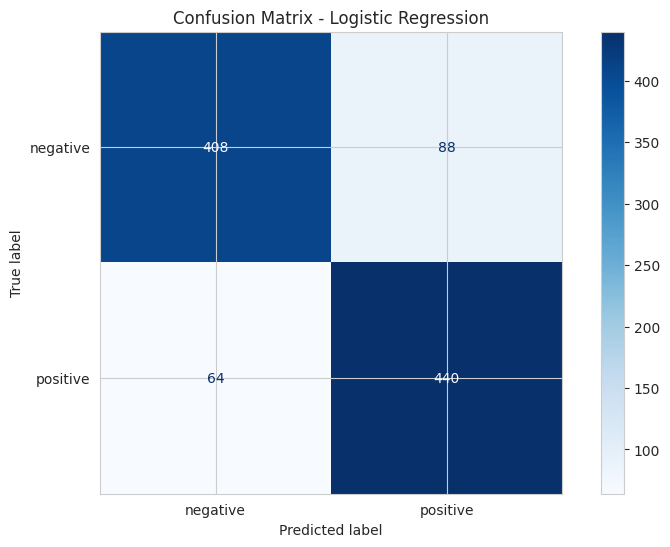

In [ ]:
# Plot confusion matrix for Logistic Regression
# YOUR CODE HERE

# Hint:
# cm = confusion_matrix(y_test, y_pred_lr)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
# disp.plot(cmap='Blues', values_format='d')
# plt.title('Confusion Matrix - Logistic Regression')
# plt.show()
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

### 📊 Interpretation: Logistic Regression

*Analyze the results:*

1. **Overall performance**: Overall preformance was good.
2. **Strengths**: Predicting the positives and negative sentiments at a balanced level.
3. **Weaknesses**: Weakness would be a slight high number in false negatives.
4. **Confusion matrix insights**: Shows a good distinction with 408 tn and 440 tp.

## Evaluate Model 2: Naive Bayes

In [ ]:
# Calculate metrics for Naive Bayes
# YOUR CODE HERE

# Follow the same pattern as above
print("=" * 50)
print("NAIVE BAYES RESULTS")
print("=" * 50)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

print(f"Accuracy:  {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall:    {recall_nb:.4f}")
print(f"F1-Score:  {f1_nb:.4f}")
print("\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

NAIVE BAYES RESULTS
Accuracy:  0.8430
Precision: 0.8431
Recall:    0.8430
F1-Score:  0.8430


Classification Report:
              precision    recall  f1-score   support

    negative       0.84      0.85      0.84       496
    positive       0.85      0.84      0.84       504

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000



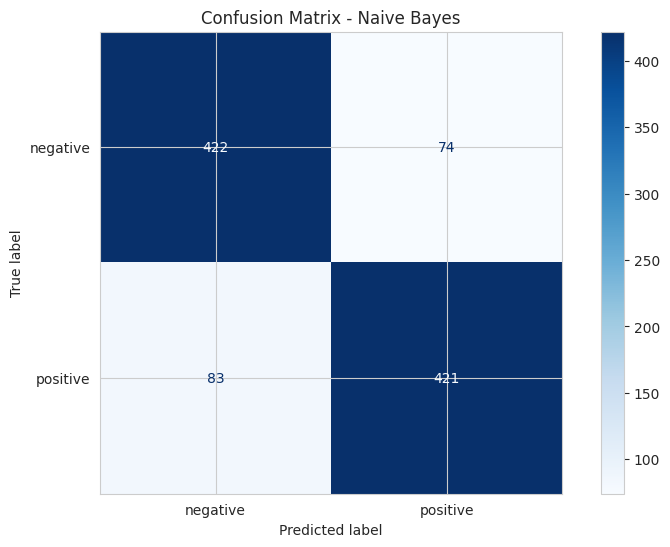

In [ ]:
# Plot confusion matrix for Naive Bayes
# YOUR CODE HERE
import matplotlib.pyplot as plt

cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb_model.classes_)
disp_nb.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

### 📊 Interpretation: Naive Bayes

*Analyze the results:*

1. **Overall performance**:
2. **Strengths**:
3. **Weaknesses**:
4. **Confusion matrix insights**:

## Evaluate Model 3 (Optional)

In [ ]:
# Calculate metrics for your third model (if applicable)
# YOUR CODE HERE

In [ ]:
# Plot confusion matrix for your third model (if applicable)
# YOUR CODE HERE

## Model Comparison

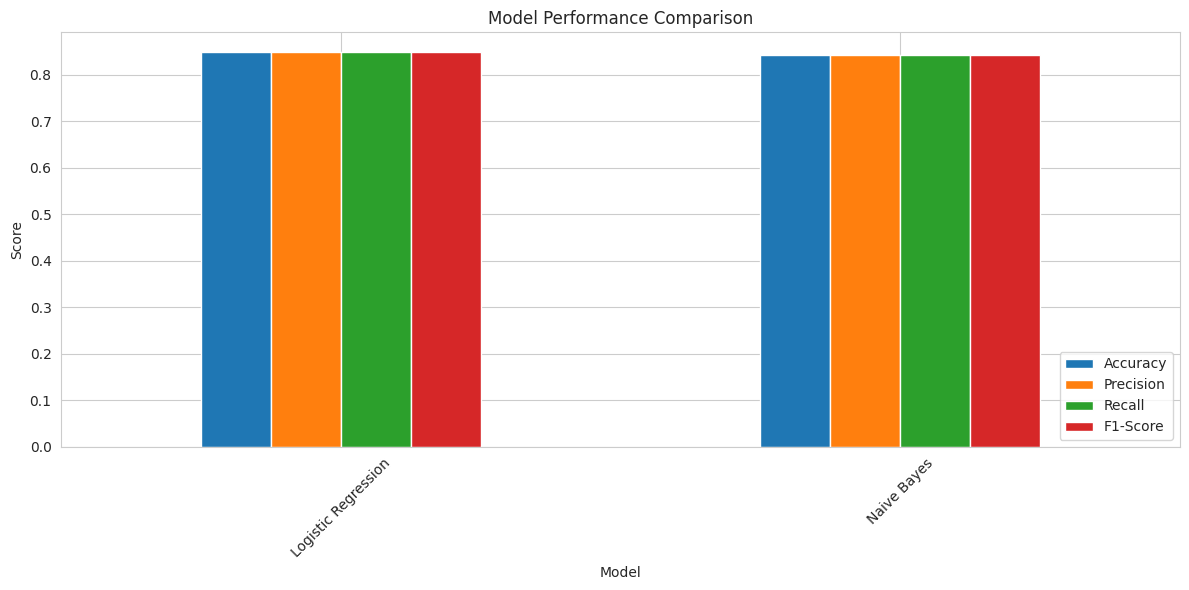

In [ ]:
# Visualize model comparison
# YOUR CODE HERE

# Hint: Create a bar plot comparing metrics across models
# results.set_index('Model').plot(kind='bar', figsize=(12, 6))
# plt.title('Model Performance Comparison')
# plt.ylabel('Score')
# plt.xticks(rotation=45)
# plt.legend(loc='lower right')
# plt.tight_layout()
# plt.show()


import matplotlib.pyplot as plt

results.set_index('Model').plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [ ]:
# Create a comparison table of all models
# YOUR CODE HERE

# Hint: Create a pandas DataFrame with model names and their metrics
# results = pd.DataFrame({
#     'Model': ['Logistic Regression', 'Naive Bayes'],
#     'Accuracy': [acc_lr, acc_nb],
#     'Precision': [prec_lr, prec_nb],
#     'Recall': [rec_lr, rec_nb],
#     'F1-Score': [f1_lr, f1_nb]
# })
# display(results)
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes'],
    'Accuracy': [accuracy_lr, accuracy_nb],
    'Precision': [precision_lr, precision_nb],
    'Recall': [recall_lr, recall_nb],
    'F1-Score': [f1_lr, f1_nb]
})

print("Model Performance Comparison:")
display(results)

Model Performance Comparison:


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.848,0.848746,0.848,0.847883
1,Naive Bayes,0.843,0.843134,0.843,0.842999


### 📊 Model Comparison Analysis

*Compare and contrast your models:*

1. **Which model performed best?**: The logistic regression performed slighlt better.
2. **What metrics did you prioritize and why?**: F1-score was prioritized due to the balancing of precision and recall being better.
3. **Trade-offs between models**: Logistic regression is robust but slower while the naive was faster and simpler.
4. **Which model would you recommend for deployment?**: I would reccomend the logistic regression model.

## Error Analysis (Optional but Recommended)

In [ ]:
# Analyze misclassified examples
# YOUR CODE HERE

# Hint: Find examples where the model was wrong
# misclassified_indices = np.where(y_pred_lr != y_test)[0]
# print(f"Number of misclassified examples: {len(misclassified_indices)}")

# Display some misclassified examples
# for idx in misclassified_indices[:5]:
#     print(f"\nText: {X_test.iloc[idx]}")
#     print(f"True label: {y_test.iloc[idx]}")
#     print(f"Predicted label: {y_pred_lr[idx]}")
#     print("-" * 80)


# Analyze misclassified examples for Logistic Regression
# Find examples where the model was wrong
misclassified_indices_lr = np.where(y_pred_lr != y_test)[0]
print(f"Number of misclassified examples by Logistic Regression: {len(misclassified_indices_lr)}")

# Display some misclassified examples
print("\n--- Sample Misclassified Examples (Logistic Regression) ---")
for idx in misclassified_indices_lr[:5]:
    original_idx = X_test.index[idx] # Get original index from X_test to retrieve full review from df
    print(f"\nText: {df.loc[original_idx, 'review'][:500]}...") # Display first 500 chars of original review
    print(f"True label: {y_test.iloc[idx]}")
    print(f"Predicted label: {y_pred_lr[idx]}")
    print("-" * 80)


Number of misclassified examples by Logistic Regression: 152

--- Sample Misclassified Examples (Logistic Regression) ---

Text: CIA analyst Douglas Freeman (Gyllenhaal) gets to see his first secret location interrogation when Anwar (Metwally) is accused of having contact with a known terrorist bomb maker. Anwar's wife (Witherspoon) is frantic regarding the whereabouts of her husband .<br /><br />Don't you just hate it when the title of a movie sends you to a dictionary? I must have an old edition as this Rendition is not a musical piece. No, it's the government's way of legally taking a resident or citizen somewhere to i...
True label: positive
Predicted label: negative
--------------------------------------------------------------------------------

Text: One of those classics, held up next to "Deep Throat" and "Behind the Green Door."<br /><br />Sure, it was clever, but the female lead isn't that attractive and sex isn't that hot. But if not for this film, porn would not have blosso

### 📊 Error Analysis Insights

*What patterns do you notice in the errors?*

1. **Common types of errors**:
2. **Why might these errors occur?**:
3. **How could you improve the model?**:

---

# Part 6: Conclusion & Business Insights 💼

## Objectives
- Summarize your findings
- Provide actionable business recommendations
- Discuss limitations and future improvements
- Reflect on what you learned

---

## 📝 Executive Summary

*Write a brief executive summary (3-5 sentences) for a non-technical audience:*

[Your summary here]

## 🎯 Key Findings

*List your main discoveries:*

1. **Dataset insights**:
   - [The main discovery was the balanced of positives and negatives.]

2. **Model performance**:
   - [Both models performed better than accepted as this was very challenging.]

3. **Best model and why**:
   - [I believe the logistic modle was better as it better in showing the true positives. This indicated ideas for future movies that are not issues because they have done a great job in that area.]

4. **Surprising discoveries**:
   - [I was surprised to find the balanced scoring and accuracy from both models.]

## 💼 Business Recommendations

*How can these results be used in practice?*

1. **Immediate applications**:
   - [Yes, this can be used for immediate applications.]

2. **Who should use this model?**:
   - [Mainly movie producers.]

3. **How to interpret predictions**:
   - [Understanding the difference in the tp and tn scores as well as showing what was important.]

4. **Warning signs to watch for**:
   - [The obvious signs would be looking out for most common words as they could be false accusations of false or negative comments. This is based of of human input that is not acurate. Maybe a person did a typo in a wrong order and confused the algorithim.]

## ⚠️ Limitations

*Be honest about the limitations of your analysis:*

1. **Data limitations**:
   - [We cant input the limitations of human input.]

2. **Model limitations**:
   - [It can not understand sarcasm as an individual could say "Man this movie was sooo bad" Would you consider this a god bad or a negative bad?]

3. **Generalization concerns**:
   - [Im concerned that i didnt have more time to evaluate thesse modules and make mandatory updates.]

4. **Resource constraints**:
   - [We are constrainted from the resource as to decide weather they are reliable or not.]

## 🚀 Future Improvements

*What would you do with more time/resources?*

1. **Data collection**:
   - [I would collect from other review sites.,]

2. **Feature engineering**:
   - [Maybe decide what words i can pinpoint as negative or positive.]

3. **Advanced models**:
   - [I would add the inclusion of not just deciding from words but how sentences are paraphrased.]

4. **Deployment considerations**:
   - [Recommend deployment to movie industries, or produces individually, maybe even schools who would find this interesting.]

## 🎓 Lessons Learned

*Reflect on your experience:*

1. **Technical skills gained**:
   - [I have learned how to use co lab as i did not previously and this was very helpful.]

2. **Challenges overcome**:
   - [Understand how to code myself instead of asking any AI what does this code mean.]

3. **What would you do differently?**:
   - [Nothing, this was just a learning project and i am glad to have learned something relevant.]

4. **Most valuable insight**:
   - [The most valued insight would be the involvement needed for completing just one task.]

---

## 🎉 Congratulations!

You've completed the sentiment analysis project! Remember to:

- ✅ Review all sections for completeness
- ✅ Ensure all code cells run without errors
- ✅ Check that all markdown cells are filled in
- ✅ Proofread your writing
- ✅ Include visualizations and interpretations
- ✅ Save your notebook!

---

### 📚 Additional Resources

- [Scikit-learn Documentation](https://scikit-learn.org/)
- [TF-IDF Explained](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)
- [Confusion Matrix Guide](https://en.wikipedia.org/wiki/Confusion_matrix)
- [Text Preprocessing Best Practices](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)

---

*Good luck with your project! 🚀*